In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Data_QC&Homozyg&merged&inbreeding/homozyg

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Data_QC&Homozyg&merged&inbreeding/homozyg


In [27]:
filelist=os.listdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Data_QC&Homozyg&merged&inbreeding/homozyg')

In [28]:
dogid=[]
for i in filelist:
  dogid.append(i.split('d-')[0])

In [29]:
df=pd.DataFrame()
for i in filelist:
  df=pd.concat([df,pd.read_fwf(i)])
df.index=dogid
df

,FID,IID,PHE,NSEG,KB,KBAVG
102,/u/home/g/gkislik/project-pellegrini/bam/102d-...,/u/home/g/gkislik/project-pellegrini/bam/102d-...,-9,264,2124370.0,8046.84
100,/u/home/g/gkislik/project-pellegrini/bam/100d-...,/u/home/g/gkislik/project-pellegrini/bam/100d-...,-9,566,1764250.0,3117.05
104,/u/home/g/gkislik/project-pellegrini/bam/104d-...,/u/home/g/gkislik/project-pellegrini/bam/104d-...,-9,290,2092890.0,7216.86
106,/u/home/g/gkislik/project-pellegrini/bam/106d-...,/u/home/g/gkislik/project-pellegrini/bam/106d-...,-9,441,1708640.0,3874.47
108,/u/home/g/gkislik/project-pellegrini/bam/108d-...,/u/home/g/gkislik/project-pellegrini/bam/108d-...,-9,446,1076670.0,2414.07
...,...,...,...,...,...,...
96,/u/home/g/gkislik/project-pellegrini/bam/96d-W...,/u/home/g/gkislik/project-pellegrini/bam/96d-W...,-9,462,1878060.0,4065.06
92,/u/home/g/gkislik/project-pellegrini/bam/92d-W...,/u/home/g/gkislik/project-pellegrini/bam/92d-W...,-9,375,1563160.0,4168.42
95,/u/home/g/gkislik/project-pellegrini/bam/95d-W...,/u/home/g/gkislik/project-pellegrini/bam/95d-W...,-9,333,2061910.0,6191.93
88,/u/home/g/gkislik/project-pellegrini/bam/88d-W...,/u/home/g/gkislik/project-pellegrini/bam/88d-W...,-9,588,1534660.0,2609.97


In [30]:
cd ..

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Data_QC&Homozyg&merged&inbreeding


In [31]:
inbreedingdf=pd.read_fwf('inbreeding.het')
index=[]
for i in inbreedingdf['FID']:
  index.append(i.split('bam/')[1].split('d-')[0])
inbreedingdf.index=index
df=pd.concat([df,inbreedingdf],axis=1)
df.drop(labels='FID',axis=1,inplace=True)
df.drop(labels='IID',axis=1,inplace=True)
df.drop(labels='PHE',axis=1,inplace=True)
df.drop(labels='O(HOM)',axis=1,inplace=True)
df.drop(labels='E(HOM)',axis=1,inplace=True)
df.drop(labels='N(NM)',axis=1,inplace=True)
df

,NSEG,KB,KBAVG,F
102,264,2124370.0,8046.84,0.431200
100,566,1764250.0,3117.05,-0.091090
104,290,2092890.0,7216.86,0.332700
106,441,1708640.0,3874.47,-0.011340
108,446,1076670.0,2414.07,-0.433100
...,...,...,...,...
96,462,1878060.0,4065.06,0.113300
92,375,1563160.0,4168.42,0.006494
95,333,2061910.0,6191.93,0.365500
88,588,1534660.0,2609.97,-0.186600


array([[<Axes: xlabel='NSEG', ylabel='NSEG'>,
        <Axes: xlabel='KB', ylabel='NSEG'>,
        <Axes: xlabel='KBAVG', ylabel='NSEG'>,
        <Axes: xlabel='F', ylabel='NSEG'>],
       [<Axes: xlabel='NSEG', ylabel='KB'>,
        <Axes: xlabel='KB', ylabel='KB'>,
        <Axes: xlabel='KBAVG', ylabel='KB'>,
        <Axes: xlabel='F', ylabel='KB'>],
       [<Axes: xlabel='NSEG', ylabel='KBAVG'>,
        <Axes: xlabel='KB', ylabel='KBAVG'>,
        <Axes: xlabel='KBAVG', ylabel='KBAVG'>,
        <Axes: xlabel='F', ylabel='KBAVG'>],
       [<Axes: xlabel='NSEG', ylabel='F'>,
        <Axes: xlabel='KB', ylabel='F'>,
        <Axes: xlabel='KBAVG', ylabel='F'>,
        <Axes: xlabel='F', ylabel='F'>]], dtype=object)

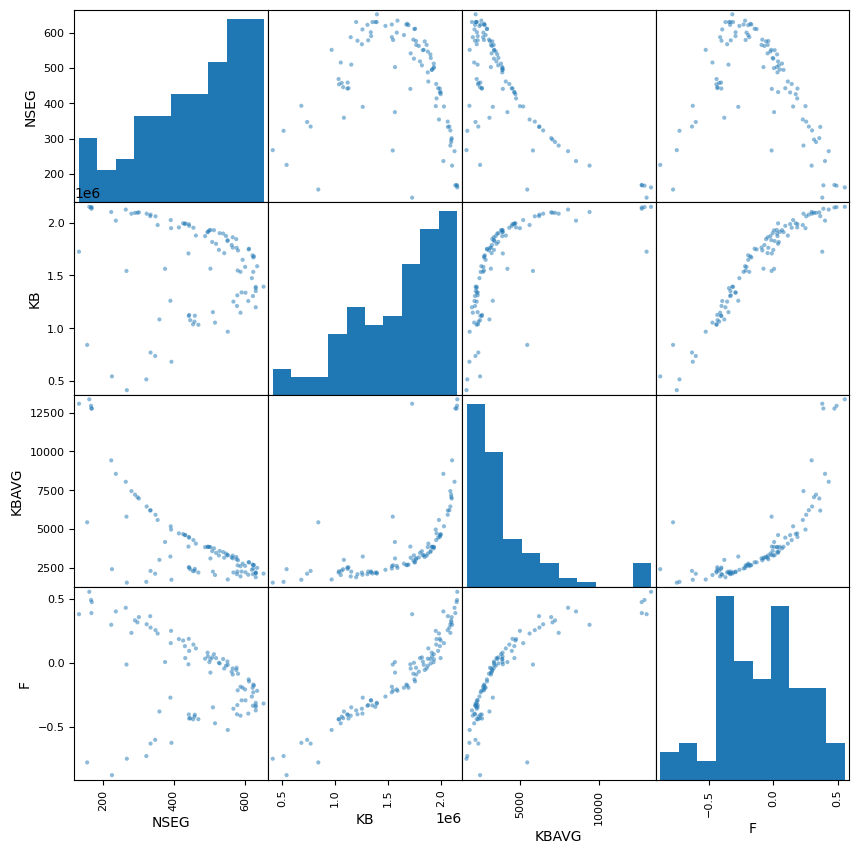

In [32]:
pd.plotting.scatter_matrix(df,figsize=(10,10))